### Reference
https://recruit.cct-inc.co.jp/tecblog/machine-learning/pca-kaisetsu/

data= [[5.1 1.4]
 [4.9 1.4]
 [4.7 1.3]
 [4.6 1.5]
 [5.  1.4]
 [5.4 1.7]
 [4.6 1.4]
 [5.  1.5]
 [4.4 1.4]
 [4.9 1.5]
 [5.4 1.5]
 [4.8 1.6]
 [4.8 1.4]
 [4.3 1.1]
 [5.8 1.2]
 [5.7 1.5]
 [5.4 1.3]
 [5.1 1.4]
 [5.7 1.7]
 [5.1 1.5]
 [5.4 1.7]
 [5.1 1.5]
 [4.6 1. ]
 [5.1 1.7]
 [4.8 1.9]
 [5.  1.6]
 [5.  1.6]
 [5.2 1.5]
 [5.2 1.4]
 [4.7 1.6]
 [4.8 1.6]
 [5.4 1.5]
 [5.2 1.5]
 [5.5 1.4]
 [4.9 1.5]
 [5.  1.2]
 [5.5 1.3]
 [4.9 1.4]
 [4.4 1.3]
 [5.1 1.5]
 [5.  1.3]
 [4.5 1.3]
 [4.4 1.3]
 [5.  1.6]
 [5.1 1.9]
 [4.8 1.4]
 [5.1 1.6]
 [4.6 1.4]
 [5.3 1.5]
 [5.  1.4]
 [7.  4.7]
 [6.4 4.5]
 [6.9 4.9]
 [5.5 4. ]
 [6.5 4.6]
 [5.7 4.5]
 [6.3 4.7]
 [4.9 3.3]
 [6.6 4.6]
 [5.2 3.9]
 [5.  3.5]
 [5.9 4.2]
 [6.  4. ]
 [6.1 4.7]
 [5.6 3.6]
 [6.7 4.4]
 [5.6 4.5]
 [5.8 4.1]
 [6.2 4.5]
 [5.6 3.9]
 [5.9 4.8]
 [6.1 4. ]
 [6.3 4.9]
 [6.1 4.7]
 [6.4 4.3]
 [6.6 4.4]
 [6.8 4.8]
 [6.7 5. ]
 [6.  4.5]
 [5.7 3.5]
 [5.5 3.8]
 [5.5 3.7]
 [5.8 3.9]
 [6.  5.1]
 [5.4 4.5]
 [6.  4.5]
 [6.7 4.7]
 [6.3 4.4]
 [5.6 4.1]
 [5.5 4. ]
 [5.

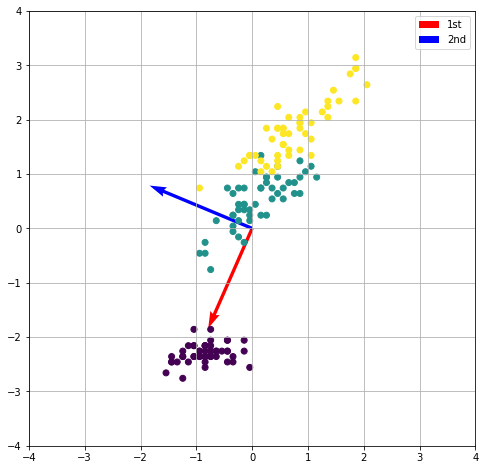

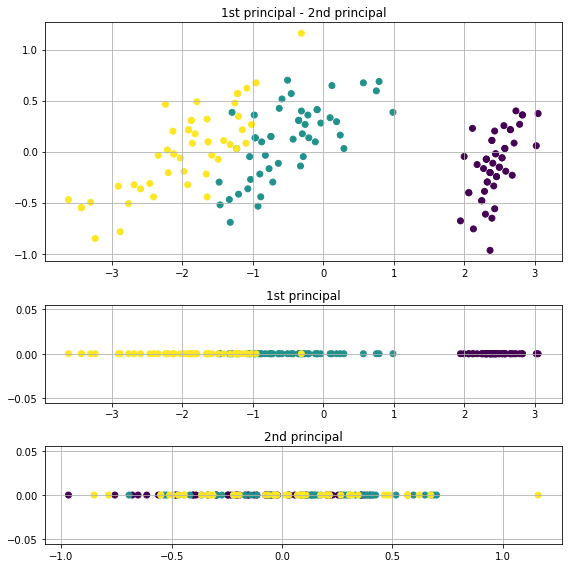

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris

def pca_use_org(data):
    # ##################### 主成分分析 ########################
    # 共分散行列を求める
    cov_matrix = np.cov(data, rowvar=False)
 
    # 固有値と固有ベクトルを取得する
    l, v = np.linalg.eig(cov_matrix)
 
    # 固有値を大きい順に並べる
    l_index = np.argsort(l)[::-1]
    l_ = l[l_index]
    v_ = v[:, l_index]
 
    # 固有ベクトルを使ってデータを変換する
    data_trans = np.dot(data, v_)
 
    return data_trans, v_
 
 
if __name__ == "__main__":
    # ###################### データ作成 ########################
    # データセットから2次元データを切り出す
    d_index = [0, 2]
    iris = load_iris()
    data = iris.data
    data = data[:, d_index]
 
    # データ全体の平均を0にする
    print('data=', data)
    data -= data.mean(axis=0)
    print('data=', data)
 
    # #################### 主成分分析開始 #######################
    # 自作関数(numpyはその限りではない)でPCA
    data_trans, v = pca_use_org(data)
 
    # ###################### 作図準備 ###########################
    # 変換軸となるベクトルを描画用の変数に格納
    vec_s = [0, 0]
    vec_1st_e = [2*v[0, 0], 2*v[0, 1]]
    vec_2nd_e = [2*v[1, 0], 2*v[1, 1]]
 
    # ######################## 作図開始 ########################
    # -------------------- 変換前データと変換軸ベクトル ---------
    plt.figure(figsize=[8, 8])
    plt.xlim(-4, 4)
    plt.ylim(-4, 4)
    plt.quiver(vec_s[0], vec_s[1], vec_1st_e[0], vec_1st_e[1],
               angles='xy', scale_units='xy', scale=1, color='r', label='1st')
    plt.quiver(vec_s[0], vec_s[1], vec_2nd_e[0], vec_2nd_e[1],
               angles='xy', scale_units='xy', scale=1, color='b', label='2nd')
    plt.grid()
    plt.legend()
    plt.scatter(data[:, 0], data[:, 1], c=iris.target)
    plt.savefig('charts/fig-3.png')
 
    # -------------- 変換後データ、第1主成分、第2主成分 ---------
    plt.figure(figsize=[8, 8])
    plt.subplot2grid((4, 1), (0, 0), rowspan=2)
    plt.title('1st principal - 2nd principal')
    plt.grid()
    plt.scatter(data_trans[:, 0], data_trans[:, 1], c=iris.target)
    plt.subplot2grid((4, 1), (2, 0))
    plt.tick_params(labelleft="off", left="off")
    plt.title('1st principal')
    plt.grid()
    plt.scatter(data_trans[:, 0], np.zeros(len(data_trans[:, 0])), c=iris.target)
    plt.subplot2grid((4, 1), (3, 0))
    plt.title('2nd principal')
    plt.grid()
    plt.tick_params(labelleft="off", left="off")
    plt.scatter(data_trans[:, 1], np.zeros(len(data_trans[:, 1])), c=iris.target)
    plt.tight_layout()
    plt.show()